## The purpose of this notebook is to test familiarity with NumPy and Matplotlib. The exercises below guide you through calculating properties of random integers drawn from a uniform distribution. 

## Please show your work for each exercise you attempt. 

## This is an open-book exam. Please consult official documentation through the web browser if needed.

### 1) Import Matplotlib and NumPy here.

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import numpy as np

### 2) Calculate and store 1000 random integers between 0 and 100 inclusive.

In [2]:
int_thous=np.random.randint(low=0,high=101,size=1000)

### 3) Show kind of data structure are the random integers stored in.

In [3]:
type(int_thous)

numpy.ndarray

### 4) Verify the minimum and maximum values of the random integers. Print these values to standard out as a tuple.

In [4]:
tup=(np.min(int_thous),np.max(int_thous))
print(tup)

(0, 100)


### 5) Sort the random integers in reverse order. Print the result to standard out.

In [5]:
print(-np.sort(-int_thous))

[100 100 100 100 100 100  99  99  99  99  99  99  99  99  98  98  98  98
  98  98  98  98  98  98  98  98  98  98  98  97  97  97  97  97  97  97
  96  96  96  95  95  95  95  95  95  95  95  95  94  94  94  94  94  94
  94  94  93  93  93  93  93  93  93  93  93  93  93  93  93  93  93  92
  92  92  92  92  92  92  92  91  91  91  91  91  91  91  91  91  91  91
  91  91  91  90  90  90  90  90  90  90  89  89  89  89  89  89  89  89
  89  89  89  89  89  88  88  88  88  88  88  88  88  87  87  87  87  87
  87  87  86  86  86  86  86  86  86  86  86  86  85  85  85  85  85  85
  85  85  85  85  85  84  84  84  84  84  84  84  84  84  83  83  83  83
  83  83  83  83  83  83  83  83  83  83  82  82  82  82  82  82  82  82
  82  82  82  82  82  82  81  81  81  81  80  80  80  80  80  80  80  80
  80  79  79  79  79  79  79  79  79  79  79  79  79  79  79  78  78  78
  78  78  78  77  77  77  77  77  77  76  76  76  76  76  76  76  76  75
  75  75  75  75  75  75  75  75  75  75  75  75  7

### 6a) How many unique integers are represented in the random numbers?  
### 6b) Is this what you expect? Type your explanation as a comment.

In [6]:
print('6a) There are total ' + str(np.unique(int_thous).size) +' unique random numbers')
# 6b) Yes, this is what I expect.

6a) There are total 101 unique random numbers


### 7a) How many 50s are in your distribution of random numbers?  
### 7b) How many 50s would you expect to find?  
### 7c) Sketch out the key steps for testing the statistical signifance of your result.

In [7]:
num_fiftys=str(np.sum((int_thous>=50) & (int_thous<=59)))
print('7a) There are '+num_fiftys+' "50s" numbers')
print('7b) Expect there are 99 "50s" numbers')

7a) There are 88 "50s" numbers
7b) Expect there are 99 "50s" numbers


##### 7c) Test of Significance
    Key Steps: 
    1. We would like to exam the number of "50s" sample is following a uniform distribution
    2. Let's use Chi-Square Test statistic and P-value (0.05) for our goodness-of-fit test
    3. Hypothesis:
        - Ho: Our underlying sample distribution is uniformly distributed
        - Ha: Our underlying sample distribution is NOT uniformly distributed
    4. We firstly calculate the Chi-Square Statistics, For example assume there are 107 numbers in 50s, then we have the following table:

| Group | Sample  | Expect  |
| --- | --- | --- |
|'50s' Group|107|100|
|Non '50s' Group|99|901|   
    
    Chi-Square is calculated as (107-99)^2/99 + (893-901)^2/901 = 0.72
    
    5. Then we calculate the degree of freedom (1 in this case)
    6. After that we obtain the P value from a Chi-Square table (0.462433 in this case)
    7. Finally we compare our calculated P value to 0.05 (P - Significance) value
        - if P value > 0.05, we CANNOT reject Ho. ie, There is no statistical evidence to against the "50s" sample distribution is uniformly distributed
        - if P value <0.05, we CAN reject Ho. ie, support Ha, That is we can say the underlying sample distribution is not uniformly distributed.
    8. In our case, P cal = 0.72 which is > 0.05, hence we conclude "There is no statistical evidence to against the "50s" sample distribution is uniformly distributed"

### 8) Find and plot the probability mass function (PMF) of the integers.

In [8]:
# According to PMF definition:
# P(X = x) = f(x)
# In our case, f(x)=1/(b-a+1) where b=100, a=0, hence we have f(x)=0.00990099 or 0.99% for x = 0,1,2,3,...,99,100
##

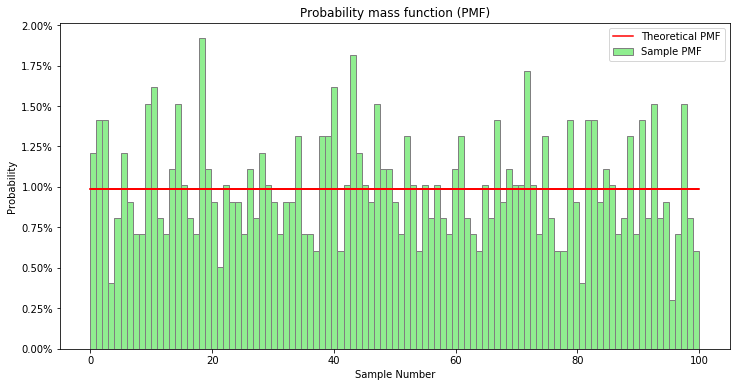

In [9]:
fx=1/(100-0+1)
pdf_uniform=np.repeat(fx,1000)

fig, ax = plt.subplots(figsize=(12, 6))
ax.set_ylabel('Probability')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_xlabel('Sample Number')
ax.set_title('Probability mass function (PMF)')

ax.hist(int_thous, color = 'lightgreen', edgecolor = 'grey',
         bins = np.unique(int_thous).size, density=True,label='Sample PMF')
ax.plot(int_thous, pdf_uniform,color = 'red',label='Theoretical PMF')
ax.legend()
plt.show()

### 9a) Convert the PMF to a cumulative distribution function (CDF).
### 9b) What is the expected shape of this plot? How could we modify the above directions to achieve that result? Type your answer as a comment.
### 9c) Type as a comment the meaning of the function evaluated at x=75.
### 9d) Show on this plot as a red line the mean of the random integers.

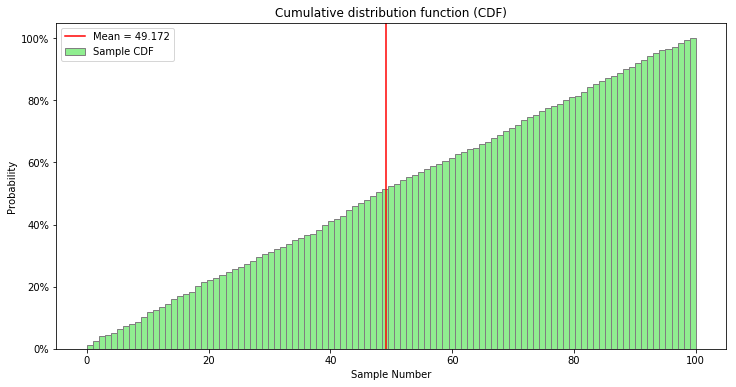

In [10]:
# 9a)
# According to PMF definition:
# F(x) = P(X<=t)
# In our case, F(x)=t/(b-a+1) where b=100, a=0
##

# 9b)
# Expect a triangle shape area chart run about a 45 degree angel from left to right end.

# 9c) F(x=75) is the probability that a random variable is less than or equal to 75  

# 9d)
m=np.mean(int_thous)
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_ylabel('Probability')
ax.set_xlabel('Sample Number')
ax.set_title('Cumulative distribution function (CDF)')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))

ax.hist(int_thous, color = 'lightgreen', edgecolor = 'grey',
         bins = np.unique(int_thous).size, density=True, cumulative=True,label='Sample CDF')
plt.axvline(m,color='red',label='Mean = '+str(m))
ax.legend()
plt.show()